In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
df=pd.read_csv('train.csv')
dt=pd.read_csv('test.csv')
sf=pd.read_csv('sample_submission.csv')

In [11]:
df = df.drop('id', axis=1)
dt = dt.drop('id', axis=1)

# SUPRESS WARNINGS

In [13]:
import warnings
warnings.filterwarnings('ignore')

# Print All Variables

In [15]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [16]:
df.shape,dt.shape,sf.shape

((188533, 12), (125690, 11), (125690, 2))

In [17]:
df.describe()
df.info()

,model_year,milage,price
count,188533.000000,188533.000000,1.885330e+05
mean,2015.829998,65705.295174,4.387802e+04
std,5.660967,49798.158076,7.881952e+04
min,1974.000000,100.000000,2.000000e+03
25%,2013.000000,24115.000000,1.700000e+04
50%,2017.000000,57785.000000,3.082500e+04
75%,2020.000000,95400.000000,4.990000e+04
max,2024.000000,405000.000000,2.954083e+06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 17.3+ MB


In [18]:
df.isnull().sum()
dt.isnull().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64

In [19]:
df.duplicated().sum()
dt.duplicated().sum()

0

0

## So bascialy only three Columns has Missing values in them
    ### 1. accident has very less percentage of values Missing and we can impute it with Mode value
    ### 2. Fuel_type has Value Missing completely at Random and Covariance,correlation with price can be understood for Imputing.
    ### 3. clean_title has High value in missing and let's see what can be done with that

In [21]:
df['accident'].mode()
df['accident'].unique()

0    None reported
Name: accident, dtype: object

array(['None reported', 'At least 1 accident or damage reported', nan],
      dtype=object)

In [22]:
df['clean_title'].mode()
df['clean_title'].unique()

0    Yes
Name: clean_title, dtype: object

array(['Yes', nan], dtype=object)

# Imputing missing in the clean_title

In [24]:
def fill_clean_title(row):
    
    
    if pd.isna(row['clean_title']):
        return 'missing'
    return row['clean_title']

df['clean_title'] = df.apply(fill_clean_title, axis=1)
dt['clean_title'] = dt.apply(fill_clean_title, axis=1)

<Axes: xlabel='clean_title'>

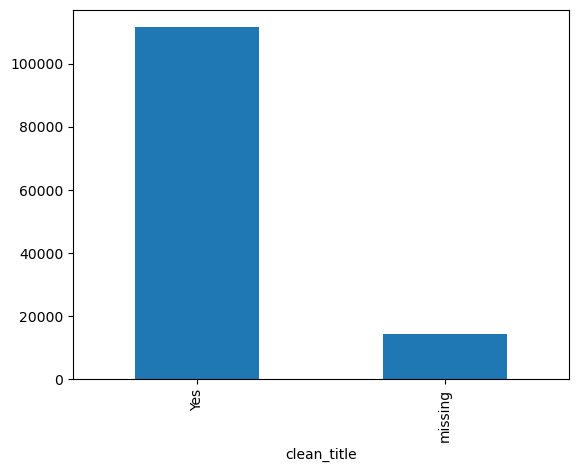

In [25]:
dt['clean_title'].value_counts().plot(kind='bar')

In [26]:
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy='constant',fill_value='Missing')

In [27]:
df['accident'].unique()

array(['None reported', 'At least 1 accident or damage reported', nan],
      dtype=object)

In [28]:
df['accident'].mode()

0    None reported
Name: accident, dtype: object

fig = plt.figure()
ax = fig.add_subplot(111)

df[df['accident']==0]['price'].plot(kind='kde', ax=ax)

df[df['accident'].isnull()]['price'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['None accident', 'Nan accident']
ax.legend(lines, labels, loc='best')

plt.title('Death Walk');

In [30]:
df['accident']=df['accident'].map({'None reported': 0,'At least 1 accident or damage reported': 1})
dt['accident']=dt['accident'].map({'None reported': 0,'At least 1 accident or damage reported': 1})

In [31]:
dt['accident'].unique()

array([ 0.,  1., nan])

In [32]:
dt['accident'].isna().mean()

0.012984326517622723

In [33]:
df.dropna(subset=['accident'], inplace=True)

In [34]:
df.isnull().mean()*100
dt.isnull().mean()*100

brand           0.000000
model           0.000000
model_year      0.000000
milage          0.000000
fuel_type       2.694526
engine          0.000000
transmission    0.000000
ext_col         0.000000
int_col         0.000000
accident        0.000000
clean_title     0.000000
price           0.000000
dtype: float64

brand           0.000000
model           0.000000
model_year      0.000000
milage          0.000000
fuel_type       2.691543
engine          0.000000
transmission    0.000000
ext_col         0.000000
int_col         0.000000
accident        1.298433
clean_title     0.000000
dtype: float64

In [35]:
dt.isnull().sum()

brand              0
model              0
model_year         0
milage             0
fuel_type       3383
engine             0
transmission       0
ext_col            0
int_col            0
accident        1632
clean_title        0
dtype: int64

In [36]:
df.sample(2)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
93609,Ford,Flex Limited,2006,120000,Gasoline,210.0HP 3.7L V6 Cylinder Engine Gasoline Fuel,4-Speed A/T,Beige,Black,0.0,Yes,4000
2929,Audi,A4 2.0T Titanium Premium,2015,62660,Gasoline,188.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Gray,0.0,Yes,31500


In [37]:
df['brand'].value_counts()

brand
Ford             22766
Mercedes-Benz    19004
BMW              16830
Chevrolet        16125
Audi             10790
Porsche          10406
Land              9425
Toyota            8746
Lexus             8573
Jeep              6304
Cadillac          4605
RAM               4176
Nissan            3895
Tesla             3703
INFINITI          3237
GMC               3162
Dodge             3085
Mazda             2693
Kia               2447
Lincoln           2392
Subaru            2369
Acura             2259
Honda             2062
Hyundai           2015
Volkswagen        1745
Jaguar            1295
Bentley           1125
MINI              1053
Genesis            952
Maserati           928
Buick              927
Lamborghini        793
Chrysler           717
Volvo              712
Alfa               665
Rivian             570
Rolls-Royce        553
Mitsubishi         543
Pontiac            535
Hummer             516
Ferrari            352
McLaren            242
Aston              237
Satur

In [38]:
df['model_year'].value_counts()

model_year
2021    17811
2018    16233
2020    15587
2022    15430
2019    15211
2016    13548
2017    12677
2015    11286
2023     8584
2014     8327
2013     6736
2011     6214
2012     6038
2008     5109
2007     4837
2010     4204
2005     3091
2006     2794
2009     2694
2004     2553
2003     1887
2001     1517
2002     1264
2000      552
1999      552
1998      337
1997      312
1996      187
2024      158
1993      136
1995      100
1994       92
1992       13
1974       10
Name: count, dtype: int64

In [39]:
df.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

<Axes: xlabel='fuel_type'>

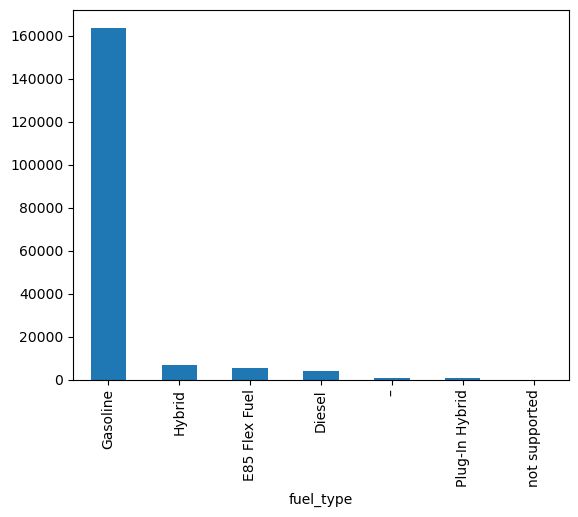

In [40]:
df['fuel_type'].value_counts().plot(kind='bar')

In [41]:
df['fuel_type'].mode()

0    Gasoline
Name: fuel_type, dtype: object

In [42]:
df.isnull().sum()

brand              0
model              0
model_year         0
milage             0
fuel_type       5014
engine             0
transmission       0
ext_col            0
int_col            0
accident           0
clean_title        0
price              0
dtype: int64

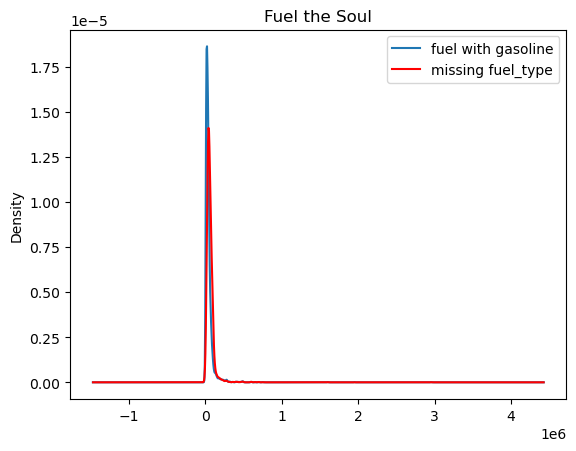

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['fuel_type']=='Gasoline']['price'].plot(kind='kde', ax=ax)

df[df['fuel_type'].isnull()]['price'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['fuel with gasoline', 'missing fuel_type']
ax.legend(lines, labels, loc='best')

plt.title('Fuel the Soul');

In [44]:
df['fuel_type'].fillna('Gasoline', inplace=True)

In [45]:
df['fuel_type'].mode()

0    Gasoline
Name: fuel_type, dtype: object

In [46]:
df['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', 'Hybrid', 'Diesel', 'Plug-In Hybrid',
       '–', 'not supported'], dtype=object)

<Axes: xlabel='fuel_type'>

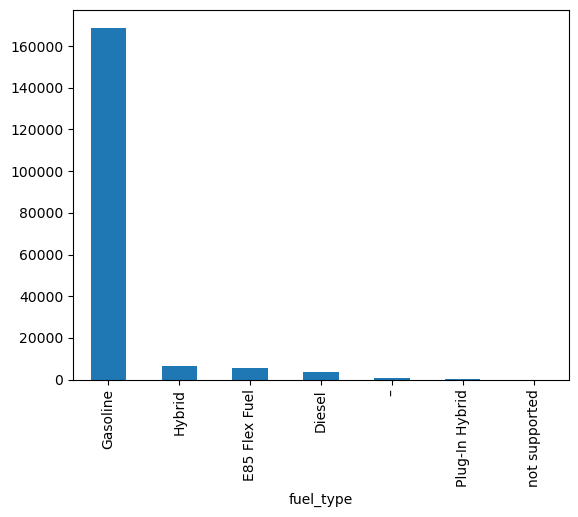

In [47]:
df['fuel_type'].value_counts().plot(kind='bar')

In [48]:
# Bar chart shows that we can IMPUTE Gasoline as Fuel type in missing values

In [49]:
df.dtypes

brand            object
model            object
model_year        int64
milage            int64
fuel_type        object
engine           object
transmission     object
ext_col          object
int_col          object
accident        float64
clean_title      object
price             int64
dtype: object

In [50]:
df['transmission'].unique()

array(['A/T', 'Transmission w/Dual Shift Mode', '7-Speed A/T',
       '8-Speed A/T', '10-Speed Automatic', '1-Speed A/T', '6-Speed A/T',
       '10-Speed A/T', '9-Speed A/T', '8-Speed Automatic',
       '9-Speed Automatic', '5-Speed A/T', 'Automatic',
       '7-Speed Automatic with Auto-Shift', 'CVT Transmission',
       '5-Speed M/T', 'M/T', '6-Speed M/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T', '2-Speed A/T',
       '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T',
       '6-Speed Manual', 'Transmission Overdrive Switch',
       '8-Speed Automatic with Auto-Shift', '7-Speed Manual',
       '7-Speed Automatic', '9-Speed Automatic with Auto-Shift',
       '6-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O', 'F', 'CVT-F',
       '8-Speed Manual', 'Manual', '–', '2', '6 Speed At/Mt',
       '5-Speed Automatic', '2-Speed Automatic', '8-SPEED A/T', '7-Speed',
       'Variable', 'Single-Speed Fixed Gear', '8-SPEED AT',


In [51]:
df['transmission'].value_counts()

transmission
A/T                                                   49520
8-Speed A/T                                           20328
Transmission w/Dual Shift Mode                        19063
6-Speed A/T                                           17898
6-Speed M/T                                           11852
7-Speed A/T                                           10981
Automatic                                             10475
8-Speed Automatic                                      8190
10-Speed A/T                                           7942
9-Speed A/T                                            3820
5-Speed A/T                                            3182
10-Speed Automatic                                     3038
6-Speed Automatic                                      2706
4-Speed A/T                                            2527
5-Speed M/T                                            2383
9-Speed Automatic                                      2278
CVT Transmission           

<Axes: xlabel='transmission'>

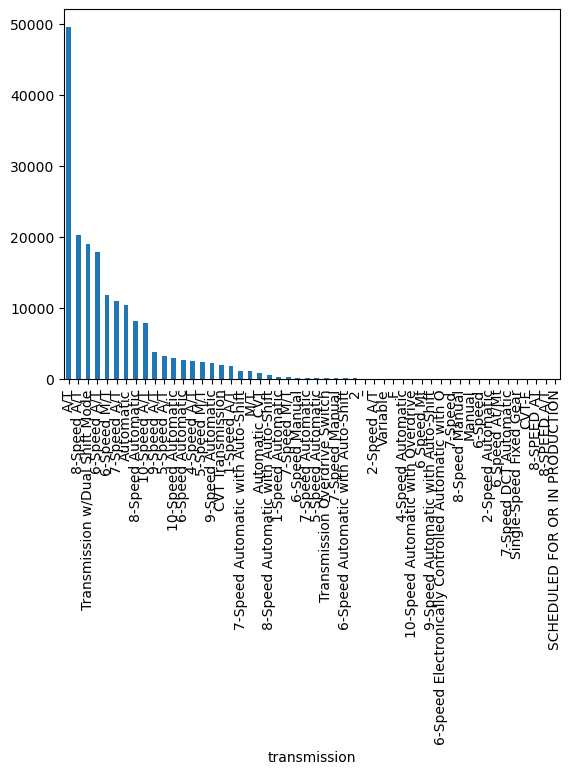

In [52]:
df['transmission'].value_counts().plot(kind='bar')

In [53]:
df.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [54]:
df['ext_col'].unique()

array(['Yellow', 'Silver', 'Blue', 'Black', 'White',
       'Snowflake White Pearl Metallic', 'Gray', 'Green',
       'Santorini Black Metallic', 'Purple', 'Ebony Twilight Metallic',
       'Red', 'Magnetite Black Metallic', 'Diamond Black', 'Vega Blue',
       'Beige', 'Gold', 'Platinum White Pearl', 'Metallic',
       'White Frost Tri-Coat', 'Phytonic Blue Metallic', 'Blu', 'Orange',
       'Brown', 'Brilliant Silver Metallic', 'Black Raven',
       'Black Clearcoat', 'Firenze Red', 'Agate Black Metallic',
       'Glacial White Pearl', 'Majestic Plum Metallic',
       'designo Diamond White Metallic', 'Oxford White',
       'Black Sapphire Metallic', 'Mythos Black',
       'Granite Crystal Clearcoat Metallic', 'White Diamond Tri-Coat',
       'Magnetite Gray Metallic', 'Carpathian Grey Premium Metallic',
       'designo Diamond White Bright',
       'Phantom Black Pearl Effect / Black Roof', 'Nebula Gray Pearl',
       'Deep Crystal Blue Mica', 'Flame Red Clearcoat',
       'Lunar Bl

In [55]:
df['ext_col'].value_counts()

ext_col
Black                    48119
White                    43411
Gray                     25006
Silver                   16766
Blue                     14398
                         ...  
Frozen White                 5
Dark Gray Metallic           5
GT SILVER                    5
BLUE                         3
Mango Tango Pearlcoat        1
Name: count, Length: 319, dtype: int64

In [56]:
df['int_col'].unique()

array(['Gray', 'Beige', 'Black', '–', 'Blue', 'White', 'Red', 'Brown',
       'Dark Galvanized', 'Parchment.', 'Boulder', 'Orange',
       'Medium Earth Gray', 'Ebony', 'Canberra Beige', 'Jet Black',
       'Silver', 'Light Platinum / Jet Black', 'Macchiato/Magmagrey',
       'Gold', 'Cloud', 'Rioja Red', 'Global Black', 'Green',
       'Medium Stone', 'Navy Pier', 'Dark Ash', 'BLACK', 'Portland',
       'Sandstone', 'Canberra Beige/Black', 'Diesel Gray / Black',
       'Sarder Brown', 'Black Onyx', 'White / Brown', 'Black/Gun Metal',
       'Slate', 'Satin Black', 'Macchiato Beige/Black', 'Charcoal',
       'Black / Express Red', 'Cappuccino', 'Aragon Brown', 'Parchment',
       'Oyster W/Contrast', 'Adrenaline Red', 'Ebony.', 'Shara Beige',
       'Graystone', 'Pearl Beige', 'Nero Ade', 'Graphite',
       'Tan/Ebony/Ebony', 'Charcoal Black', 'Medium Ash Gray',
       'Ebony Black', 'Light Titanium', 'Sakhir Orange', 'Tan',
       'Rock Gray', 'Brandy', 'Carbon Black', 'Amber',
      

In [57]:
df['accident'].unique()

array([0., 1.])

In [58]:
df['accident'].value_counts()

accident
0.0    144514
1.0     41567
Name: count, dtype: int64

In [59]:
df.sample()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
100848,Porsche,911 Carrera,2022,16701,Gasoline,379.0HP 3.0L Flat 6 Cylinder Engine Gasoline Fuel,6-Speed M/T,Silver,Black,0.0,Yes,229000


In [60]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

[]

In [61]:
df['clean_title'].value_counts()

clean_title
Yes        167100
missing     18981
Name: count, dtype: int64

In [62]:
len(df['clean_title'].value_counts())

2

In [63]:
len(df['clean_title'].dropna())/ len(df)

1.0

# MODEL YEAR-->AGE

## DATA TRANSFORMATIONS

### "model_year" shows the car model year. We can replace this column with the cars age attribute.To calculate the age, we consider the origin time to be 1 year older than the maximum model year:

In [67]:
dt.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title'],
      dtype='object')

In [68]:
dt.insert(0, "Age", dt["model_year"].max()+1-dt["model_year"] )
dt.drop('model_year', axis=1, inplace=True)
dt.head()

,Age,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,10,Land,Rover LR2 Base,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,0.0,Yes
1,5,Land,Rover Defender SE,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,0.0,Yes
2,3,Ford,Expedition Limited,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,0.0,missing
3,9,Audi,A6 2.0T Sport,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,0.0,missing
4,7,Audi,A6 2.0T Premium Plus,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,0.0,Yes


In [69]:
df.insert(0, "Age", df["model_year"].max()+1-df["model_year"] )
df.drop('model_year', axis=1, inplace=True)
df.head()

,Age,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,18,MINI,Cooper S Base,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,0.0,Yes,4200
1,23,Lincoln,LS V8,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,1.0,Yes,4999
2,23,Chevrolet,Silverado 2500 LT,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,0.0,Yes,13900
3,8,Genesis,G90 5.0 Ultimate,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,0.0,Yes,45000
4,4,Mercedes-Benz,Metris Base,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,0.0,Yes,97500


In [70]:
dt.columns

Index(['Age', 'brand', 'model', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title'],
      dtype='object')

## Handaling Fuel Type

In [72]:
# Function to extract fuel type
def extract_fuel_type(engine_info):
    if pd.isna(engine_info):
        return np.nan
    if 'Gasoline' in engine_info:
        return 'Gasoline'
    elif 'Hybrid' in engine_info:
        return 'Hybrid'
    elif 'Flex Fuel' in engine_info or 'E85' in engine_info:
        return 'Flex Fuel'
    elif 'Diesel' in engine_info:
        return 'Diesel'
    elif 'Electric' in engine_info:
        return 'Electric'
    else:
        return np.nan

# Process for the main DataFrame
df['extracted_fuel_type'] = df['fuel_type'].apply(extract_fuel_type)  # Extract fuel types
df['fuel_type'].fillna(df['extracted_fuel_type'], inplace=True)     # Fill missing fuel types
df.drop(columns=['extracted_fuel_type'], inplace=True)              # Clean up temporary column

# Replace unwanted values with NaN
df['fuel_type'].replace(['not supported', '-','–'], np.nan, inplace=True)

# Display unique values after replacement
print(df['fuel_type'].unique())

['Gasoline' 'E85 Flex Fuel' 'Hybrid' 'Diesel' 'Plug-In Hybrid' nan]


In [73]:
df['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', 'Hybrid', 'Diesel', 'Plug-In Hybrid',
       nan], dtype=object)

# Numerical Columns Description

In [75]:
df.describe(include='number')

,Age,milage,accident,price
count,186081.000000,186081.000000,186081.000000,1.860810e+05
mean,9.189375,65908.688910,0.223381,4.373274e+04
std,5.659525,49829.705377,0.416513,7.846176e+04
min,1.000000,100.000000,0.000000,2.000000e+03
25%,5.000000,24300.000000,0.000000,1.700000e+04
50%,8.000000,57918.000000,0.000000,3.050000e+04
75%,12.000000,95500.000000,0.000000,4.970000e+04
max,51.000000,405000.000000,1.000000,2.954083e+06


# Object Columns Description:

In [77]:
df.describe(include='object')

,brand,model,fuel_type,engine,transmission,ext_col,int_col,clean_title
count,186081,186081,185302,186081,186081,186081,186081,186081
unique,57,1897,5,1116,52,319,156,2
top,Ford,F-150 XLT,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,Yes
freq,22766,2885,168867,3451,49520,48119,106337,167100


In [78]:
OrderedCols = np.concatenate([df.select_dtypes(exclude='object').columns.values, 
                              df.select_dtypes(include='object').columns.values])
OrderedCols

array(['Age', 'milage', 'accident', 'price', 'brand', 'model',
       'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col',
       'clean_title'], dtype=object)

sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

OrderedCols = np.concatenate([df.select_dtypes(exclude='object').columns.values, 
                              df.select_dtypes(include='object').columns.values])
fig, ax = plt.subplots(3, 4, figsize=(30, 15), dpi=100)
for i, col in enumerate(OrderedCols):
    x = i // 4
    y = i % 4
    if i < 3:
        sns.boxplot(data=df, y=col, ax=ax[x, y])
        ax[x, y].yaxis.label.set_size(15)
    else:
        sns.boxplot(data=df, x=col, y='price', ax=ax[x, y])
        ax[x, y].xaxis.label.set_size(15)
        ax[x, y].yaxis.label.set_size(15)
plt.tight_layout()    
plt.show();

In [80]:
df['engine'].unique()

array(['172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel',
       '252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel',
       '320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability', ...,
       '78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel',
       '139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas',
       '313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas'],
      dtype=object)

In [81]:
import re


# Function to extract horsepower, engine capacity, and cylinder count
def extract_engine_specs(engine):
    # Extract horsepower
    hp_match = re.search(r'(\d+\.\d+)HP', engine)
    hp = float(hp_match.group(1)) if hp_match else None
    
    # Extract engine capacity
    capacity_match = re.search(r'(\d+\.\d+)L', engine)
    capacity = float(capacity_match.group(1)) if capacity_match else None
    
    # Extract number of cylinders
    cylinder_match = re.search(r'(\d+) Cylinder', engine)
    cylinders = int(cylinder_match.group(1)) if cylinder_match else None
    
    return pd.Series([hp, capacity, cylinders])

# Apply the function and create new columns in the same DataFrame
df[['horsepower', 'engine_capacity', 'cylinders']] = df['engine'].apply(extract_engine_specs)
dt[['horsepower', 'engine_capacity', 'cylinders']] = df['engine'].apply(extract_engine_specs)

# Display the updated dataframe
print(df.sample(2))


        Age brand            model  milage fuel_type  \
11673     9  Audi        A8 L 3.0T   55000  Gasoline   
116777   10  Audi  A3 2.0T Premium   11110  Gasoline   

                                               engine transmission ext_col  \
11673   333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel          A/T   Black   
116777   220.0HP 2.0L 4 Cylinder Engine Gasoline Fuel  6-Speed A/T   White   

       int_col  accident clean_title  price  horsepower  engine_capacity  \
11673    Black       0.0         Yes  16490       333.0              3.0   
116777   Black       0.0         Yes  12999       220.0              2.0   

        cylinders  
11673         6.0  
116777        4.0  


In [82]:
pd.set_option('display.max_columns', None)

In [83]:
df.head(5)

,Age,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horsepower,engine_capacity,cylinders
0,18,MINI,Cooper S Base,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,0.0,Yes,4200,172.0,1.6,4.0
1,23,Lincoln,LS V8,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,1.0,Yes,4999,252.0,3.9,8.0
2,23,Chevrolet,Silverado 2500 LT,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,0.0,Yes,13900,320.0,5.3,8.0
3,8,Genesis,G90 5.0 Ultimate,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,0.0,Yes,45000,420.0,5.0,8.0
4,4,Mercedes-Benz,Metris Base,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,0.0,Yes,97500,208.0,2.0,4.0


In [84]:
df['clean_title'].unique()

array(['Yes', 'missing'], dtype=object)

In [85]:
df.isnull().sum()

Age                    0
brand                  0
model                  0
milage                 0
fuel_type            779
engine                 0
transmission           0
ext_col                0
int_col                0
accident               0
clean_title            0
price                  0
horsepower         32428
engine_capacity    14078
cylinders          36977
dtype: int64

In [86]:
len(df['horsepower'].dropna())/ len(df)

0.8257318049666543

In [87]:
df.drop(columns=['engine','transmission','model'], inplace=True)
dt.drop(columns=['engine','transmission','model'], inplace=True)

In [88]:
dt.columns
df.columns

Index(['Age', 'brand', 'milage', 'fuel_type', 'ext_col', 'int_col', 'accident',
       'clean_title', 'horsepower', 'engine_capacity', 'cylinders'],
      dtype='object')

Index(['Age', 'brand', 'milage', 'fuel_type', 'ext_col', 'int_col', 'accident',
       'clean_title', 'price', 'horsepower', 'engine_capacity', 'cylinders'],
      dtype='object')

In [89]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 5 categorical variables

The categorical variables are : ['brand', 'fuel_type', 'ext_col', 'int_col', 'clean_title']


In [90]:
# view the categorical variables

df[categorical].head()

,brand,fuel_type,ext_col,int_col,clean_title
0,MINI,Gasoline,Yellow,Gray,Yes
1,Lincoln,Gasoline,Silver,Beige,Yes
2,Chevrolet,E85 Flex Fuel,Blue,Gray,Yes
3,Genesis,Gasoline,Black,Black,Yes
4,Mercedes-Benz,Gasoline,Black,Beige,Yes


In [91]:
# check missing values in categorical variables

df[categorical].isnull().sum()

brand            0
fuel_type      779
ext_col          0
int_col          0
clean_title      0
dtype: int64

In [92]:
# view frequency of categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

brand
Ford             22766
Mercedes-Benz    19004
BMW              16830
Chevrolet        16125
Audi             10790
Porsche          10406
Land              9425
Toyota            8746
Lexus             8573
Jeep              6304
Cadillac          4605
RAM               4176
Nissan            3895
Tesla             3703
INFINITI          3237
GMC               3162
Dodge             3085
Mazda             2693
Kia               2447
Lincoln           2392
Subaru            2369
Acura             2259
Honda             2062
Hyundai           2015
Volkswagen        1745
Jaguar            1295
Bentley           1125
MINI              1053
Genesis            952
Maserati           928
Buick              927
Lamborghini        793
Chrysler           717
Volvo              712
Alfa               665
Rivian             570
Rolls-Royce        553
Mitsubishi         543
Pontiac            535
Hummer             516
Ferrari            352
McLaren            242
Aston              237
Satur

## One By One Working Over The Categorical Variables

# Number of labels: cardinality
## The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high 

## cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [95]:
# BRAND has various values in occurance may inducing cardinality cars below 1000 occurance is Treated as Luxury for the case Here
dt['brand'].unique()
len(dt['brand'].unique())
df['brand'].unique()
len(df['brand'].unique())

array(['Land', 'Ford', 'Audi', 'Chevrolet', 'Lexus', 'Mercedes-Benz',
       'Genesis', 'Mazda', 'Porsche', 'Jaguar', 'Honda', 'BMW', 'Toyota',
       'Hummer', 'RAM', 'Jeep', 'Cadillac', 'Saturn', 'Kia', 'Lincoln',
       'Nissan', 'Volkswagen', 'Chrysler', 'Dodge', 'Maserati', 'Subaru',
       'Hyundai', 'Mitsubishi', 'INFINITI', 'Tesla', 'Lamborghini',
       'MINI', 'GMC', 'Acura', 'Buick', 'Rivian', 'Pontiac', 'Alfa',
       'Mercury', 'Volvo', 'Rolls-Royce', 'McLaren', 'Bentley', 'Aston',
       'FIAT', 'Scion', 'Ferrari', 'Lucid', 'Saab', 'Maybach', 'Karma',
       'Suzuki', 'Lotus', 'Bugatti', 'Plymouth'], dtype=object)

55

array(['MINI', 'Lincoln', 'Chevrolet', 'Genesis', 'Mercedes-Benz', 'Audi',
       'Ford', 'BMW', 'Tesla', 'Cadillac', 'Land', 'GMC', 'Toyota',
       'Hyundai', 'Volvo', 'Volkswagen', 'Buick', 'Rivian', 'RAM',
       'Hummer', 'Alfa', 'INFINITI', 'Jeep', 'Porsche', 'McLaren',
       'Honda', 'Lexus', 'Dodge', 'Nissan', 'Jaguar', 'Acura', 'Kia',
       'Mitsubishi', 'Rolls-Royce', 'Maserati', 'Pontiac', 'Saturn',
       'Bentley', 'Mazda', 'Subaru', 'Ferrari', 'Aston', 'Lamborghini',
       'Chrysler', 'Lucid', 'Lotus', 'Scion', 'smart', 'Karma',
       'Plymouth', 'Suzuki', 'FIAT', 'Saab', 'Bugatti', 'Mercury',
       'Polestar', 'Maybach'], dtype=object)

57

In [96]:
dt['brand'].value_counts()

brand
Ford             15265
Mercedes-Benz    12875
BMW              11286
Chevrolet        10698
Audi              7289
Porsche           7153
Land              6348
Toyota            6084
Lexus             5729
Jeep              4412
Cadillac          3059
RAM               2753
Nissan            2674
Tesla             2387
INFINITI          2123
GMC               2094
Dodge             2071
Mazda             1770
Kia               1750
Lincoln           1593
Subaru            1591
Acura             1567
Honda             1436
Hyundai           1308
Volkswagen        1222
Jaguar             934
Bentley            789
MINI               697
Buick              651
Genesis            643
Maserati           619
Volvo              576
Lamborghini        547
Chrysler           514
Alfa               467
Rivian             390
Rolls-Royce        383
Mitsubishi         367
Hummer             342
Pontiac            341
Ferrari            251
McLaren            165
Aston              144
Satur

In [97]:
# Convert the 'brand' column to lowercase
df['brand'] = df['brand'].str.lower()
dt['brand'] = df['brand'].str.lower()

# Count the occurrences of each brand
#brand_counts = df['brand'].value_counts()
brand_counts = dt['brand'].value_counts()
# Identify brands with occurrences less than 900 and replace them with 'luxury'
df['brand'] = df['brand'].apply(lambda x: 'luxury' if brand_counts[x] < 900 else x)
#dt['brand'] = dt['brand'].apply(lambda x: 'luxury' if brand_counts[x] < 900 else x)

# Verify the changes
print(df['brand'].value_counts())


brand
ford             22766
mercedes-benz    19004
bmw              16830
chevrolet        16125
luxury           13267
audi             10790
porsche          10406
land              9425
toyota            8746
lexus             8573
jeep              6304
cadillac          4605
ram               4176
nissan            3895
tesla             3703
infiniti          3237
gmc               3162
dodge             3085
mazda             2693
kia               2447
lincoln           2392
subaru            2369
acura             2259
honda             2062
hyundai           2015
volkswagen        1745
Name: count, dtype: int64


In [98]:
# List of luxury car brands
luxury_brands = [
    'Lamborghini', 'Chrysler', 'Volvo', 'Alfa', 'Rivian', 'Rolls-Royce', 'Mitsubishi', 'Pontiac', 
    'Hummer', 'Ferrari', 'McLaren', 'Aston', 'Saturn', 'Scion', 'Lucid', 'Mercury', 'Lotus', 
    'FIAT', 'Saab', 'Karma', 'Suzuki', 'Plymouth', 'Bugatti', 'Polestar', 'smart', 'Maybach'
]

# Convert matching brands to 'luxury'
dt.loc[dt['brand'].isin(luxury_brands), 'brand'] = 'luxury'
print(dt['brand'].value_counts())

brand
ford             15173
mercedes-benz    12728
bmw              11264
chevrolet        10742
audi              7229
porsche           6922
land              6322
toyota            5829
lexus             5764
jeep              4076
cadillac          3052
ram               2807
nissan            2586
tesla             2437
infiniti          2110
gmc               2088
dodge             2041
mazda             1814
kia               1626
subaru            1601
lincoln           1598
acura             1508
honda             1394
hyundai           1307
volkswagen        1191
jaguar             868
bentley            747
mini               719
genesis            630
maserati           606
buick              602
lamborghini        539
chrysler           497
volvo              461
alfa               460
mitsubishi         391
rivian             373
rolls-royce        367
pontiac            357
hummer             328
ferrari            225
mclaren            162
aston              158
satur

In [99]:
(
df
.sort_values(["brand", "fuel_type", "price", "cylinders"])
)

,Age,brand,milage,fuel_type,ext_col,int_col,accident,clean_title,price,horsepower,engine_capacity,cylinders
12365,14,acura,185000,E85 Flex Fuel,Black,Black,0.0,Yes,8500,300.0,3.7,6.0
125775,17,acura,179000,E85 Flex Fuel,Brown,Beige,1.0,Yes,8995,300.0,3.7,6.0
133424,12,acura,101600,E85 Flex Fuel,Silver,Black,1.0,Yes,11500,300.0,3.7,6.0
182229,13,acura,162500,E85 Flex Fuel,Gray,Black,0.0,Yes,12400,300.0,3.7,6.0
143201,11,acura,95500,E85 Flex Fuel,White,Black,0.0,Yes,19000,300.0,3.7,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
65065,3,volkswagen,14739,Gasoline,Daytona Gray Pearl Effect,Black / Express Red,0.0,missing,599995,NaN,NaN,NaN
148198,4,volkswagen,33000,Hybrid,Gray,Black,0.0,Yes,50000,201.0,2.0,4.0
166409,6,volkswagen,53500,Plug-In Hybrid,White,Black,0.0,Yes,35000,416.0,3.0,6.0
29715,29,volkswagen,13500,NaN,Black,Gray,0.0,Yes,65000,NaN,NaN,NaN


In [100]:
# colour Encodings

In [101]:
int_replacements = {
    'Medium Earth Gray': 'Gray',
    'Diesel Gray / Black': 'Gray',
    'Dark Ash': 'Gray',
    'Graphite': 'Gray',
    'Dark Galvanized': 'Charcoal',
    'Light Gray': 'Gray',
    'Ash': 'Gray',
    'Jet Black': 'Black',
    'Global Black': 'Black',
    'Black Onyx': 'Black',
    'Parchment.': 'Beige',
    'Sardar Brown': 'Brown',
    'Black/Gun Metal': 'Black',
    'Charcoal Black': 'Charcoal',
    'Ebony': 'Brown',
    'Ebony Black': 'Black',
    'Carbon Black': 'Black',
    'Obsidian Black': 'Black',
    'Black / Saddle Brown': 'Black',
    'Black/Saddle Brown': 'Black',
    'Black / Brown': 'Black',
    'Saddle Brown': 'Brown',
    'Sand Beige': 'Beige',
    'Camel': 'Beige',
    'Parchment': 'Beige',
    'Macchiato Beige/Black': 'Beige',
    'Silk Beige/Espresso Brown': 'Beige',
    'Canberra Beige': 'Beige',
    'Macchiato': 'Beige',
    'Almond Beige': 'Beige',
    'Grace White': 'White',
    'Ivory / Ebony': 'White',
    'Bianco Polar': 'White',
    'White / Brown': 'White',
    'Platinum': 'White',
    'Cloud': 'Blue',
    'Rift Metallic': 'White',
    'Light Platinum / Jet Black': 'Silver',
    'Billet Clearcoat Metallic': 'Silver',
    'Sakhir Orange': 'Orange',
    'Pimento Red w/Ebony': 'Red',
    'Adrenaline Red': 'Red',
    'Rioja Red': 'Red',
    'Classic Red': 'Red',
    'Magma Red': 'Red',
    'Cobalt Blue': 'Blue',
    'Tempest': 'Blue',
    'Stormy Sea': 'Blue',
    'Navy Pier': 'Blue',
    'Charles Blue': 'Blue',
    'Rhapsody Blue': 'Blue',
    'Kyalami Orange': 'Orange',
    'Sakhir Orange/Black': 'Orange',
    'Dark Gray': 'Gray',
    'Deep Garnet': 'Red',
    'Scarlet Ember': 'Red',
    'Beluga': 'Blue',
    'Chestnut': 'Brown',
    'Boulder': 'Gray',
    'Macchiato/Magmagrey': 'Beige',
    'Medium Stone': 'Gray',
    'BLACK': 'Black',
    'Portland': 'Gray',
    'Sandstone': 'Beige',
    'Slate': 'Gray',
    'Cappuccino': 'Brown',
    'Oyster W/Contrast': 'Beige',
    'Nero Ade': 'Black',
    'Light Titanium': 'Silver',
    'Tan': 'Beige',
    'Brandy': 'Brown',
    'Amber': 'Yellow',
    'Hotspur': 'Blue',
    'Chateau': 'Green',
    'Ice': 'Blue',
    'Blk': 'Black',
    'Mesa': 'Brown',
    'Espresso': 'Brown',
    'Ceramic': 'White',
    'Medium Dark Slate': 'Gray',
    'Graphite w/Gun Metal': 'Gray',
    'Cocoa / Dune': 'Brown',
    'Roast': 'Brown',
    'Hotspur Hide': 'Brown',
    'ORANGE': 'Orange',
    'Walnut': 'Brown',
    'Caramel': 'Beige',
    'Giallo Taurus / Nero Ade': 'Yellow',
    'Medium Pewter': 'Gray',
    'Camel Leather': 'Brown',
    'Anthracite': 'Gray',
    'Mocha': 'Brown',
    'Sahara Tan': 'Beige',
    'Porpoise': 'Beige',
    'Deep Cypress': 'Green',
    'Light Slate': 'Gray',
    'Beluga Hide': 'Black',
    'Tupelo': 'Green',
    'Gideon': 'Beige',
    'Medium Light Camel': 'Beige',
    'Nero': 'Black',
    'Deep Chestnut': 'Red',
    'Dark Auburn': 'Brown',
    'Shale': 'Gray',
    'BEIGE': 'Beige',
    'Linen': 'Beige',
    'WHITE': 'White'
}
ext_replacements = {
    'Blu': 'Blue',
    'BLUE': 'Blue',
    'Glacier': 'Blue',
    'BLU ELEOS': 'Blue',
    'Dark Sapphire': 'Navy',
    'Tangerine': 'Orange',
    'Pumpkin': 'Orange',
    'Clementine': 'Orange',
    'Granite': 'Gray',
    'Go Mango!': 'Yellow',
    'Onyx': 'Black',
    'Gecko Pearlcoat': 'Green',
    'Obsidian': 'Black',
    'Metallic': 'Silver',
    'Grigio Nimbus': 'Silver',
    'Chalk': 'White',
    'Bianco Monocerus': 'White',
    'Verde': 'Green',
    'Dark Graphite Metallic': 'Gray',
    'BLACK': 'Black',
    'Dark Moss': 'Green',
    'Granite Crystal Clearcoat Metallic': 'Gray',
    'Ebony Twilight Metallic': 'Black',
    'Satin Steel Metallic': 'Silver',
    'Magnetic Metallic': 'Gray',
    'Dark Matter Metallic': 'Gray',
    'Dark Ash Metallic': 'Gray',
    'Iridium Metallic': 'Gray',
    'Nightfall Mica': 'Navy',
    'Sandstone Metallic': 'Beige',
    'Rift Metallic': 'White',
    'Billet Clearcoat Metallic': 'Silver',
    'Tan': 'Beige',
    'Ice': 'Blue',
    'Hellayella': 'Yellow',
    'Granite': 'Gray',
    'Yulong': 'White',
    'Blueprint': 'Navy',
    'Arancio Borealis': 'Orange',
    'Hellayella Clearcoat': 'Yellow',
    'Moonlight Cloud': 'Navy',
    'Liquid Platinum': 'Silver',
    'Gun Metallic': 'Gray',
    'Manhattan Noir Metallic': 'Gray',
    'Lavender': 'Purple',
    'Violet': 'Purple',
    'Pink': 'Purple',
    'Mauve': 'Plum',
    'Tempest': 'Blue',
    'Nero Daytona': 'Black',
    'Scarlet Ember': 'Red',
    'Infrared Tintcoat': 'Red',
    'Maximum Steel Metallic': 'Gray',
    'Ember Pearlcoat': 'Brown',
    'Rich Garnet Metallic': 'Brown',
    'Tungsten Metallic': 'Gray',
    'Nero Noctis': 'Black',
    'Platinum Quartz Metallic': 'White',
    'Ruby Flare Pearl': 'Red',
    'Bianco Icarus Metallic': 'White',
    'Stormy Sea': 'Blue',
    'Mountain Air Metallic': 'Blue',
    'Wind Chill Pearl': 'White',
    'Iridescent Pearl Tricoat': 'White',
    'Black Cherry': 'Plum',
    'Black Forest Green': 'Green',
    'Maroon': 'Red',
    'Rosso': 'Red',
    'Rosso Corsa': 'Red',
    'Rosso Mars Metallic': 'Red',
    'Quicksilver Metallic': 'Silver',
    'Designo Magno Matte': 'Gray',
    'Granite Crystal Metallic Clearcoat': 'Gray',
    'Bianco Isis': 'White',
    'Sunset Drift Chromaflair': 'Orange',
    'Ametrin Metallic': 'Plum',
    'GT SILVER': 'Silver',
    'Caviar': 'Black'
}

In [102]:
def standardize_and_extract_colors(df, int_replacements, ext_replacements):
    # Convert all keys and values in the replacement dictionaries to lowercase
    int_replacements = {k.lower(): v.lower() for k, v in int_replacements.items()}
    ext_replacements = {k.lower(): v.lower() for k, v in ext_replacements.items()}

    # Step 1: Convert 'int_col' and 'ext_col' to lowercase
    df['int_col'] = df['int_col'].str.lower()
    df['ext_col'] = df['ext_col'].str.lower()

    # Step 2: Apply specific color replacements to standardize color names
    df['int_col'] = df['int_col'].replace(int_replacements)
    df['ext_col'] = df['ext_col'].replace(ext_replacements)

    # Define a list of common base colors
    base_colors = [
        'black', 'white', 'gray', 'silver', 'brown', 'red', 'blue', 'green',
        'beige', 'tan', 'orange', 'yellow', 'purple', 'plum', 'charcoal', 
        'ivory', 'camel', 'chestnut', 'pearl', 'linen', 'graphite', 'copper', 
        'slate', 'bronze', 'sand', 'amber', 'macchiato', 'ebony', 'cocoa', 'navy'
    ]
    
    # Function to find base color
    def find_base_color(text):
        for color in base_colors:
            if color in text:
                return color
        return 'other'  # Return 'other' if no base color is found
    
    # Step 3: Apply base color extraction after standardization
    df['int_col'] = df['int_col'].apply(find_base_color)
    df['ext_col'] = df['ext_col'].apply(find_base_color)

    return df

# Apply the function to your datasets
df = standardize_and_extract_colors(df, int_replacements, ext_replacements)
dt = standardize_and_extract_colors(dt, int_replacements, ext_replacements)

In [103]:
dt[categorical].head(2)

,brand,fuel_type,ext_col,int_col,clean_title
0,mini,Gasoline,white,beige,Yes
1,lincoln,Hybrid,silver,black,Yes


In [104]:
df['clean_title'].unique()

array(['Yes', 'missing'], dtype=object)

In [105]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 7 numerical variables

The numerical variables are : ['Age', 'milage', 'accident', 'price', 'horsepower', 'engine_capacity', 'cylinders']


In [106]:
df['Age'].value_counts()

Age
4     17811
7     16233
5     15587
3     15430
6     15211
9     13548
8     12677
10    11286
2      8584
11     8327
12     6736
14     6214
13     6038
17     5109
18     4837
15     4204
20     3091
19     2794
16     2694
21     2553
22     1887
24     1517
23     1264
25      552
26      552
27      337
28      312
29      187
1       158
32      136
30      100
31       92
33       13
51       10
Name: count, dtype: int64

In [107]:
# view the numerical variables

df[numerical].head()

,Age,milage,accident,price,horsepower,engine_capacity,cylinders
0,18,213000,0.0,4200,172.0,1.6,4.0
1,23,143250,1.0,4999,252.0,3.9,8.0
2,23,136731,0.0,13900,320.0,5.3,8.0
3,8,19500,0.0,45000,420.0,5.0,8.0
4,4,7388,0.0,97500,208.0,2.0,4.0


In [108]:
df[numerical].isnull().sum()

Age                    0
milage                 0
accident               0
price                  0
horsepower         32428
engine_capacity    14078
cylinders          36977
dtype: int64

<Axes: xlabel='horsepower', ylabel='Density'>

Text(0.5, 1.0, 'Density Plot of horsepower')

Text(0.5, 0, 'horsepower')

Text(0, 0.5, 'Density')

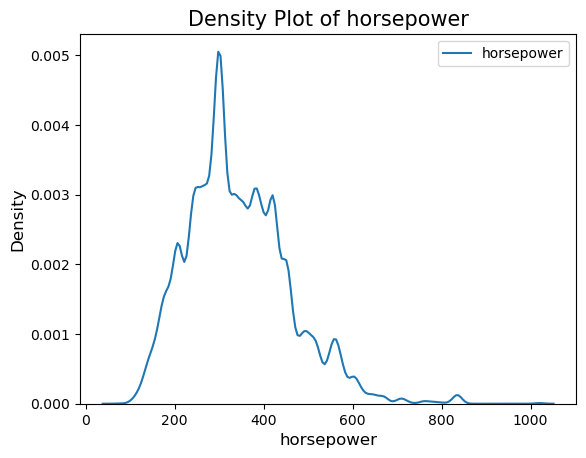

<Axes: xlabel='engine_capacity', ylabel='Density'>

Text(0.5, 1.0, 'Density Plot of engine_capacity')

Text(0.5, 0, 'engine_capacity')

Text(0, 0.5, 'Density')

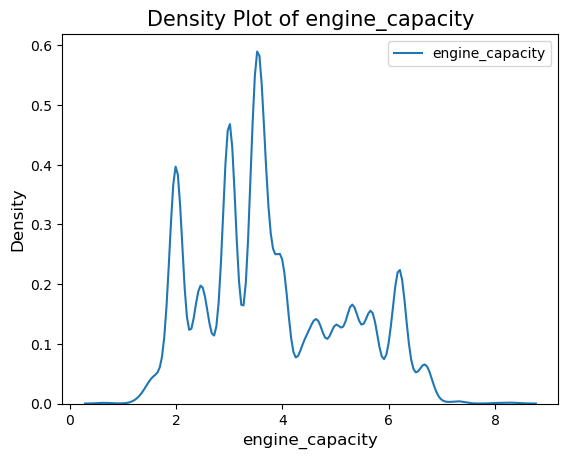

<Axes: xlabel='cylinders', ylabel='Density'>

Text(0.5, 1.0, 'Density Plot of cylinders')

Text(0.5, 0, 'cylinders')

Text(0, 0.5, 'Density')

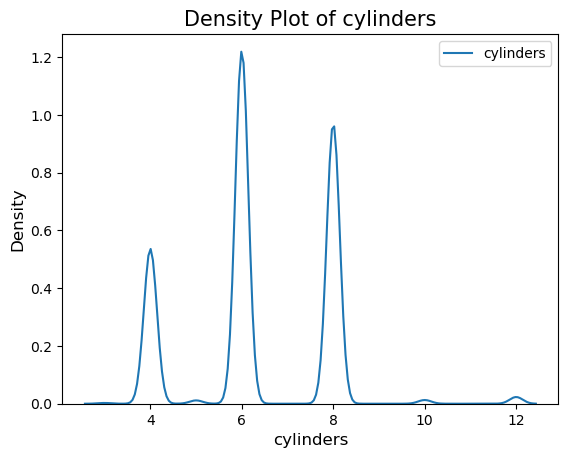

In [109]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
columns = ['horsepower', 'engine_capacity', 'cylinders']

# Loop through the columns and create separate density plots
for col in columns:
    fig = plt.figure()  # Create a new figure
    ax = fig.add_subplot(111)  # Add a subplot
    sns.kdeplot(df[col], ax=ax, label=col)  # Density plot with label

    # Add title and labels
    ax.set_title(f'Density Plot of {col}', fontsize=15)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Density', fontsize=12)

    # Add legend
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')

    plt.show();  # Show the plot for each column


In [110]:
df['cylinders'].unique()

array([ 4.,  8.,  6., nan, 10., 12.,  5.,  3.])

In [111]:
df['cylinders'].value_counts()

cylinders
6.0     65593
8.0     52038
4.0     28777
12.0     1248
10.0      688
5.0       617
3.0       143
Name: count, dtype: int64

## Imputing Cylinders Column Nan values with the Missing Category as number of Nan is very HIGH.

In [113]:
# 20% of values are missing in cylinder
len(df['cylinders'].dropna()) / len(df)

0.801285461707536

In [114]:
#from sklearn.impute import MissingIndicator
#mi = MissingIndicator(features='cylinders')

#mi.fit(df)

# Can' be Appied as InvalidParameterError: The 'features' parameter of MissingIndicator must be a str among {'all', 'missing-only'}.
# Got 'cylinders' instead. This can't be applied as missing indicator will be applied to all columns only

In [115]:
df.isna().sum()
dt.isna().sum()

Age                    0
brand                  0
milage                 0
fuel_type            779
ext_col                0
int_col                0
accident               0
clean_title            0
price                  0
horsepower         32428
engine_capacity    14078
cylinders          36977
dtype: int64

Age                    0
brand               1625
milage                 0
fuel_type           3383
ext_col                0
int_col                0
accident            1632
clean_title            0
horsepower         23194
engine_capacity    10948
cylinders          26179
dtype: int64

In [116]:
df.sample(3)

,Age,brand,milage,fuel_type,ext_col,int_col,accident,clean_title,price,horsepower,engine_capacity,cylinders
90739,9,land,65019,Gasoline,brown,brown,0.0,Yes,23500,340.0,3.0,6.0
72260,4,ford,35550,Gasoline,white,gray,1.0,Yes,36599,NaN,3.5,NaN
149254,8,ford,86111,Gasoline,white,black,0.0,Yes,19000,290.0,3.5,6.0


In [117]:
df = pd.concat([df.drop(columns=['price']), df[['price']]], axis=1)
df.sample(1)

,Age,brand,milage,fuel_type,ext_col,int_col,accident,clean_title,horsepower,engine_capacity,cylinders,price
161080,3,ram,13464,Gasoline,black,black,0.0,missing,NaN,5.7,NaN,40999


# Making Column transformer for the Data Frame

In [119]:
dt['fuel_type'].mode()

0    Gasoline
Name: fuel_type, dtype: object

In [120]:
# Random sample Imputation for the fuel_type in test data

In [121]:
dt['brand'].dropna().sample(dt['brand'].isnull().sum()).values

array(['mazda', 'kia', 'chevrolet', ..., 'mercedes-benz', 'cadillac',
       'ford'], dtype=object)

In [122]:
dt['brand'][dt['brand'].isnull()] = dt['brand'].dropna().sample(dt['brand'].isnull().sum()).values
df['brand'][df['brand'].isnull()] = df['brand'].dropna().sample(df['brand'].isnull().sum()).values

# IMPORTING LIBRARIES

In [124]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LinearRegression

In [125]:
df.isnull().sum()
dt.isnull().sum()

Age                    0
brand                  0
milage                 0
fuel_type            779
ext_col                0
int_col                0
accident               0
clean_title            0
horsepower         32428
engine_capacity    14078
cylinders          36977
price                  0
dtype: int64

Age                    0
brand                  0
milage                 0
fuel_type           3383
ext_col                0
int_col                0
accident            1632
clean_title            0
horsepower         23194
engine_capacity    10948
cylinders          26179
dtype: int64

In [126]:
df.columns
dt.columns

Index(['Age', 'brand', 'milage', 'fuel_type', 'ext_col', 'int_col', 'accident',
       'clean_title', 'horsepower', 'engine_capacity', 'cylinders', 'price'],
      dtype='object')

Index(['Age', 'brand', 'milage', 'fuel_type', 'ext_col', 'int_col', 'accident',
       'clean_title', 'horsepower', 'engine_capacity', 'cylinders'],
      dtype='object')

In [127]:
dt['accident'].value_counts()

accident
0.0    96263
1.0    27795
Name: count, dtype: int64

In [128]:
df.head(2)

,Age,brand,milage,fuel_type,ext_col,int_col,accident,clean_title,horsepower,engine_capacity,cylinders,price
0,18,luxury,213000,Gasoline,yellow,gray,0.0,Yes,172.0,1.6,4.0,4200
1,23,lincoln,143250,Gasoline,silver,beige,1.0,Yes,252.0,3.9,8.0,4999


In [129]:
df['horsepower'].isnull().sum() / len(df)
df['engine_capacity'].isnull().sum() / len(df)

0.1742681950333457

0.07565522541258914

In [130]:
dt.head(2)

,Age,brand,milage,fuel_type,ext_col,int_col,accident,clean_title,horsepower,engine_capacity,cylinders
0,10,mini,98000,Gasoline,white,beige,0.0,Yes,172.0,1.6,4.0
1,5,lincoln,9142,Hybrid,silver,black,0.0,Yes,252.0,3.9,8.0


In [131]:
numerical_features = ['Age','milage','horsepower','engine_capacity']

In [132]:
categorical_features=['brand','fuel_type','ext_col', 'int_col']

In [133]:
ordinals=['accident','cylinders','clean_title']

In [134]:

# Create DataFrames for numerical and categorical features
numerical_df = df[numerical_features]
categorical_df = df[categorical_features]

In [135]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline

In [136]:
numerical_transformer = Pipeline(steps=[
    ('KNN_impute', KNNImputer(n_neighbors=5)),
    ('MinMaxScaler', MinMaxScaler())
])

In [137]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [138]:
ordinal_transformer=Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal',OrdinalEncoder(categories=([[0., 1.],[ 4.,  8.,  6., 10., 12.,  5.,  3.],['Yes', 'missing']])))
                                   ])

In [139]:
df['accident'].unique()
df['cylinders'].unique()
df['clean_title'].unique()

array([0., 1.])

array([ 4.,  8.,  6., nan, 10., 12.,  5.,  3.])

array(['Yes', 'missing'], dtype=object)

In [140]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinals)
    ]
)

In [141]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearRegression())
])

In [142]:
from sklearn import set_config

set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('KNN_impute',
                                                                   KNNImputer()),
                                                                  ('MinMaxScaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'milage',
                                                   'horsepower',
                                                   'engine_capacity']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['brand', 'fuel_type',
                                                   'ext_col', 'int_col']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[[0.0,
                                                                                               1.0],
                                                                                              [4.0,
                                                                                               8.0,
                                                                                               6.0,
                                                                                               10.0,
                                                                                               12.0,
                                                                                               5.0,
                                                                                               3.0],
                                                                                              ['Yes',
                                                                                               'missing']]))]),
                                                  ['accident', 'cylinders',
                                                   'clean_title'])])),
                ('classifier', LinearRegression())])

In [ ]:
# Fitting the pipeline
pipe = clf.fit(df.drop(columns=['price']), df['price'])

In [ ]:
dt.sample(1)

In [ ]:
predictions = clf.predict(dt)

# Display the predictions
print(predictions)

In [ ]:
predictions.shape
dt.shape

In [ ]:
test=pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')
test.shape

In [ ]:
test.head()

In [ ]:
dt.shape

In [ ]:
# Convert tuple to array
print(np.array(predictions).shape)
print(test['id'].shape)

In [ ]:
df.columns

In [ ]:
new_df=df[['horsepower','engine_capacity','cylinders']]

# MICE IMPUTATION (Iterative Imputer) : Multivariate Imputation by Chained Equations (MICE) is a statistical method for handling missing data in a dataset. It uses a series of predictive models to impute missing values in an iterative process.

In [ ]:
new_df.isna().sum()

In [ ]:
new_df.sample()

In [ ]:
new_df[new_df.isna().any(axis=1)].sample(20)

In [ ]:
new_df.dtypes

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# Define the Iterative Imputer
imputer = IterativeImputer()

# Apply the imputer to the desired columns
df_imputed = pd.DataFrame(imputer.fit_transform(new_df), columns=new_df.columns)

# View the imputed DataFrame
print(df_imputed)

In [ ]:
df_imputed.isna().sum()